In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


In [2]:
df = pd.read_csv("../dados/tweets_ia_sentimento.csv", encoding="utf-8")


C:\Users\itsbe\AppData\Local\Temp\ipykernel_20892\1500176632.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="sentimento", order=["positivo", "neutro", "negativo"], palette="Set2")


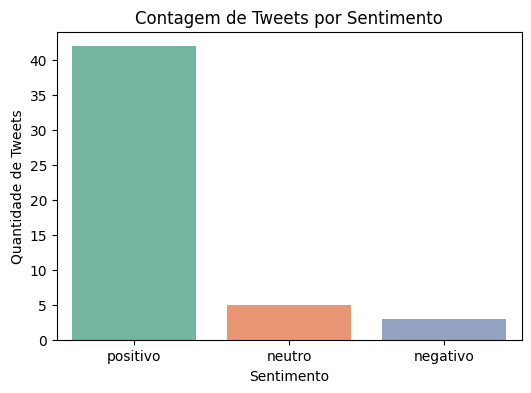

In [3]:
# gráfico de barra

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="sentimento", order=["positivo", "neutro", "negativo"], palette="Set2")
plt.title("Contagem de Tweets por Sentimento")
plt.xlabel("Sentimento")
plt.ylabel("Quantidade de Tweets")
plt.show()


C:\Users\itsbe\AppData\Local\Temp\ipykernel_20892\1789427472.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(word_counts_sorted.values()), y=list(word_counts_sorted.keys()), palette="viridis")


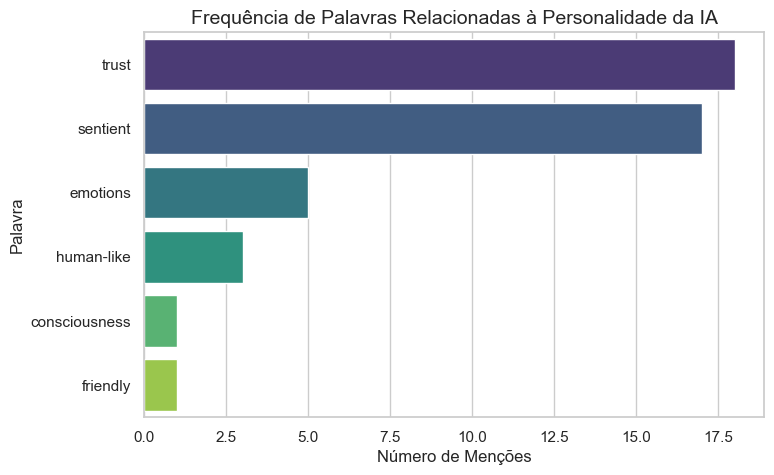

In [ ]:
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Config seaborn
sns.set(style="whitegrid")

# Palavras de interesse
palavras_interesse = [
    "friendly", "trust", "trustworthy", "dangerous", "fear",
    "human-like", "sentient", "consciousness", "emotions"
]

# Texto limpo dos tweets
all_words = " ".join(df["cleaned"].astype(str)).lower().split()
word_counts = Counter([w for w in all_words if w in palavras_interesse])

# decrescente
word_counts_sorted = dict(sorted(word_counts.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(8,5))
sns.barplot(x=list(word_counts_sorted.values()), y=list(word_counts_sorted.keys()), palette="viridis")
plt.title("Frequência de Palavras Relacionadas à Personalidade da IA", fontsize=14)
plt.xlabel("Número de Menções")
plt.ylabel("Palavra")
plt.show()


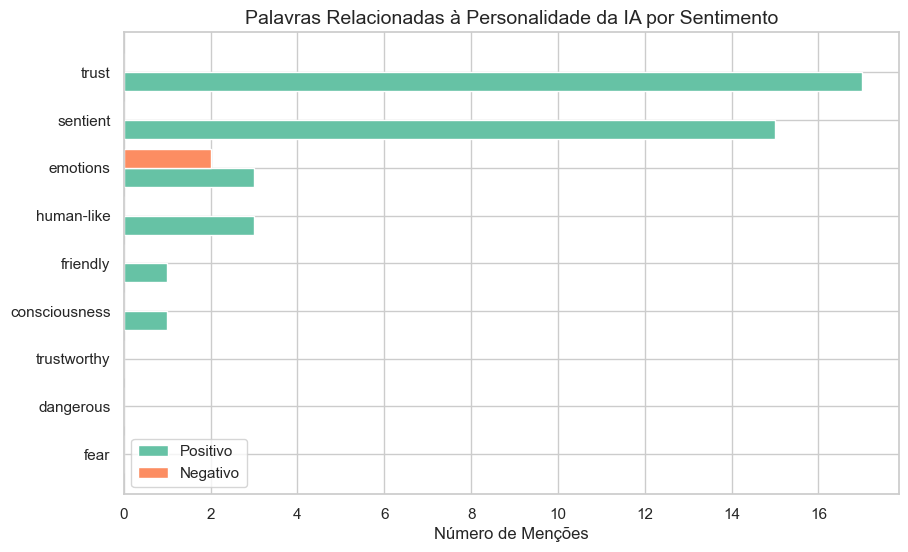

In [ ]:
# horizontal de palavras por sentimento
df_pos = df[df["sentimento"] == "positivo"]
df_neg = df[df["sentimento"] == "negativo"]

words_pos = Counter(" ".join(df_pos["cleaned"].astype(str)).lower().split())
words_neg = Counter(" ".join(df_neg["cleaned"].astype(str)).lower().split())

# Filtrar apenas palavras de interesse
words_pos_filtered = {w: words_pos[w] for w in palavras_interesse if w in words_pos}
words_neg_filtered = {w: words_neg[w] for w in palavras_interesse if w in words_neg}

# Ordenar decrescente por soma das duas contagens
all_words_sorted = sorted(
    palavras_interesse,
    key=lambda w: words_pos_filtered.get(w,0) + words_neg_filtered.get(w,0),
    reverse=True
)

pos_values = [words_pos_filtered.get(w,0) for w in all_words_sorted]
neg_values = [words_neg_filtered.get(w,0) for w in all_words_sorted]

plt.figure(figsize=(10,6))
bar_width = 0.4
y_pos = range(len(all_words_sorted))

plt.barh([y+bar_width for y in y_pos], pos_values, height=bar_width, color="#66c2a5", label="Positivo")
plt.barh(y_pos, neg_values, height=bar_width, color="#fc8d62", label="Negativo")

plt.yticks([y + bar_width/2 for y in y_pos], all_words_sorted)
plt.xlabel("Número de Menções")
plt.title("Palavras Relacionadas à Personalidade da IA por Sentimento", fontsize=14)
plt.legend()
plt.gca().invert_yaxis()  
plt.show()


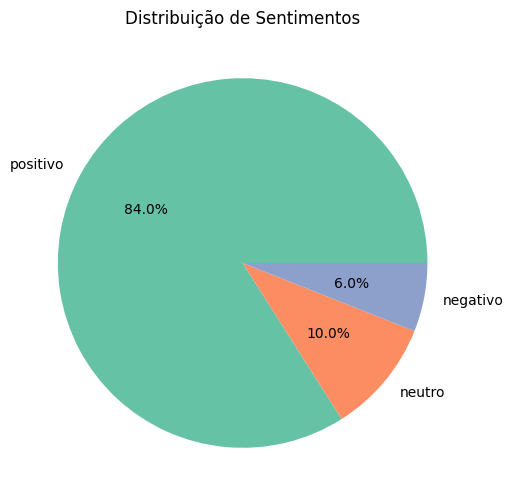

In [4]:
# gráfico de pizza

sentiment_counts = df["sentimento"].value_counts()
plt.figure(figsize=(6,6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", colors=["#66c2a5","#fc8d62","#8da0cb"])
plt.title("Distribuição de Sentimentos")
plt.show()


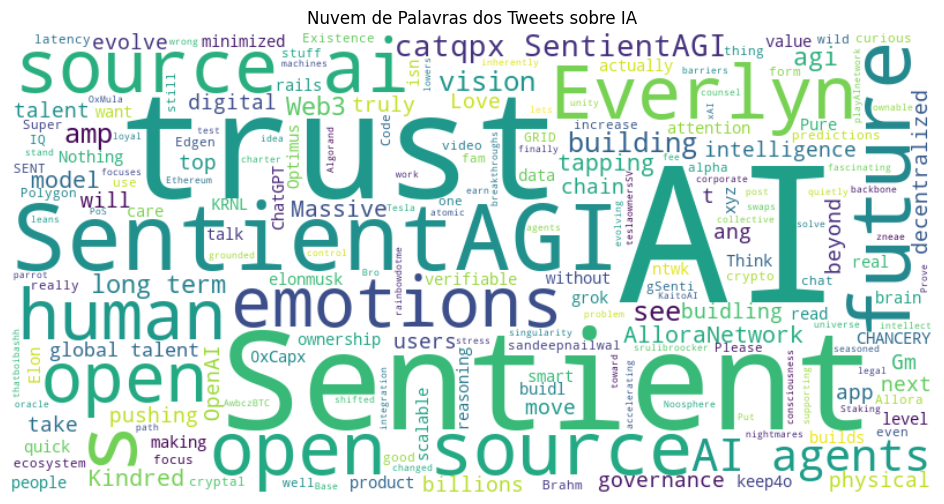

In [5]:
# nuvem de palavras

all_text = " ".join(df["cleaned"].astype(str))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(width=800, height=400, background_color="white",
                      stopwords=stopwords, colormap="viridis").generate(all_text)

plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Nuvem de Palavras dos Tweets sobre IA")
plt.show()
